# Module Dependency

In [1]:
%matplotlib inline

import numpy as np
import skimage as ski
from skimage import exposure, io
from skimage.morphology import disk, square
from skimage.filters import rank, median, gaussian
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray, gray2rgb
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Read Image

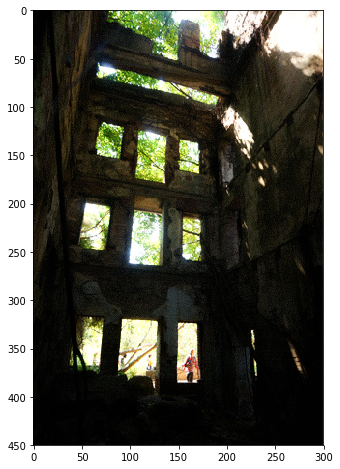

In [2]:
image = io.imread('./data/input1.bmp')
plt.imshow(image)

# Median Filter with kernel [2, 2]

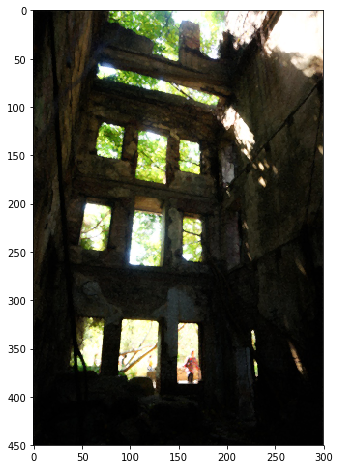

In [3]:
selem = square(2)
for i in range(3):
    image[:, :, i] = median(image[:, :, i], selem)
plt.imshow(image.astype('uint8'))

# Convert to HSV and Show V Channel Histogram

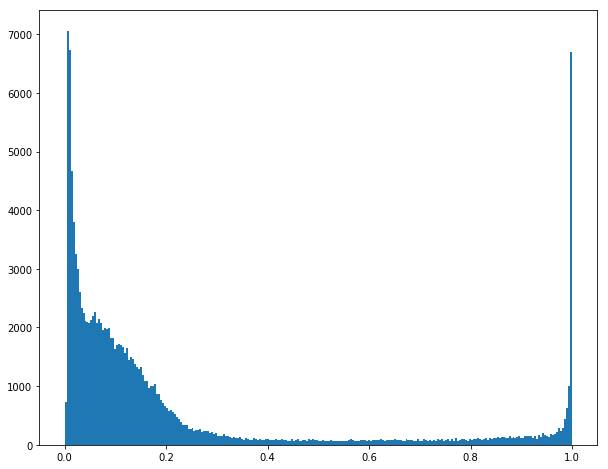

In [4]:
image = rgb2hsv(image)
plt.hist(image[:, :, 2].ravel(), bins=256)
plt.show()

# Perform Local Histogram Equalization and Show V Channel Histogram

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


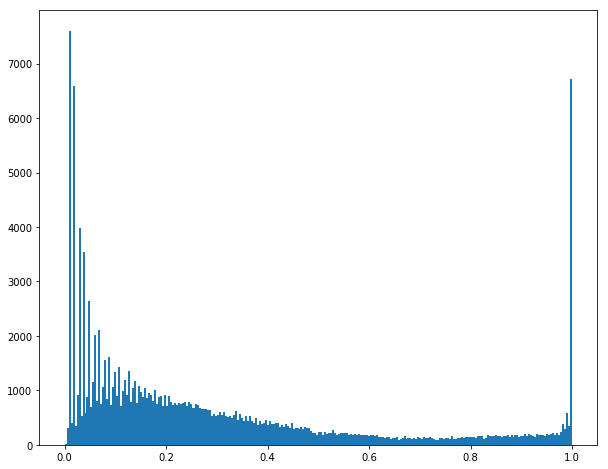

In [5]:
# image[:, :, 2] = exposure.rescale_intensity(image[:, :, 2])
image_l = image.copy()
image_l[:, :, 2] = exposure.equalize_adapthist(image_l[:, :, 2], (100, 50))
plt.hist(image_l[:, :, 2].ravel(), bins=256)
plt.show()

# Convert to RGB Space and Show it

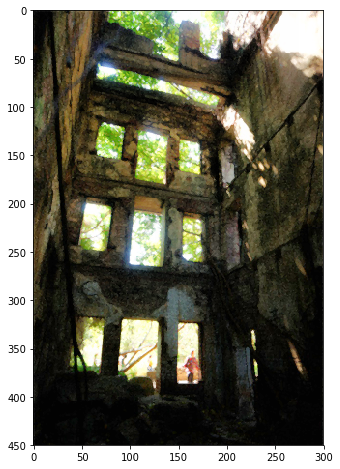

In [6]:
image_l = hsv2rgb(image_l)
plt.imshow(image_l)

# Save Image

In [7]:
io.imsave('./data/output1.bmp', image_l)

/home/dennis/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


# Perform Global Histogram Equalization and Show V Channel Histogram

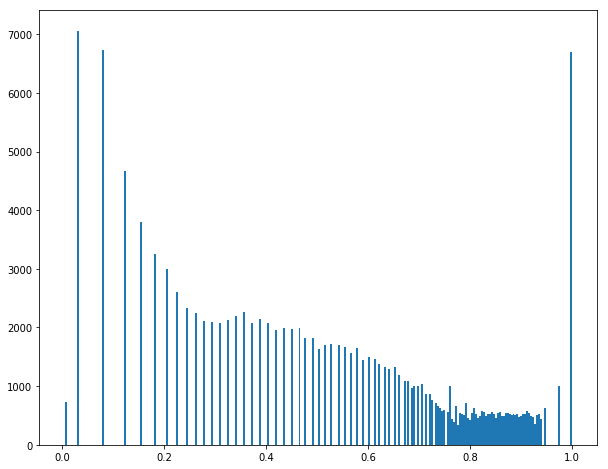

In [8]:
image_g = image.copy()
image_g[:, :, 2] = exposure.equalize_hist(image_g[:, :, 2])
plt.hist(image_g[:, :, 2].ravel(), bins=256)
plt.show()

# Show Image

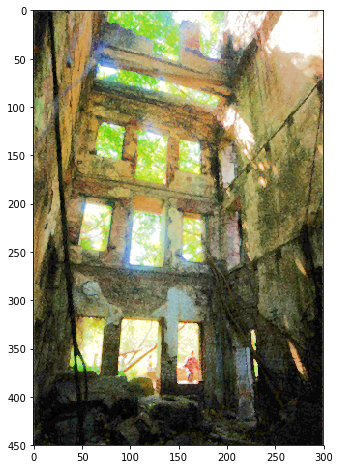

In [9]:
image_g = hsv2rgb(image_g)
plt.imshow(image_g)